In [1]:
import os
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

from astroExplain.spectra.explanation import TellMeWhy
from anomaly.constants import GALAXY_LINES
from anomaly.utils import line_width_from_velocity

In [2]:
# constants
# GALAXY_LINES

# change keys of dictionary to latex format
# For instance OII_3726 -> [OII]$\lambda~3726$
# H_alpha -> H$\alpha~6562$

In [3]:
# %%capture output
# set minor ticks on x axis as a default for all plots
# add minor ticks for all axes


def set_minorticks(axs):

    for ax in axs.flat:
        ax.minorticks_on()

In [4]:
# directories for data
bin_id = "bin_03"
user = "/home/edgar"
work_directory = f"{user}/spectra/0_01_z_0_5_4_0_snr_inf"
model = "256_128_64/latent_12/"

metric = "mse_noRel100"
# metric = "mse_filter_250kms_noRel97"
# metric = "mse_noRel97"
# metric = "mse_filter_250kms_noRel100"
# metric = "mse_filter_250kms_rel100"
# metric = "mse_filter_250kms_rel97"
# metric = "mse_rel100"
# metric = "mse_rel97"
data_directory = f"{work_directory}/{bin_id}/" f"explanation/{model}/{metric}"

In [5]:
wave = np.load(f"{work_directory}/wave_spectra_imputed.npy")

anomalies = np.load(f"{data_directory}/top_anomalies.npy")

df_anomalies = pd.read_csv(
    f"{data_directory}/top_anomalies.csv.gz", index_col="specobjid"
)

median_spectrum = np.load(f"{work_directory}/{bin_id}/median_spectrum.npy")
mean_spectrum = np.load(f"{work_directory}/{bin_id}/average_spectrum.npy")

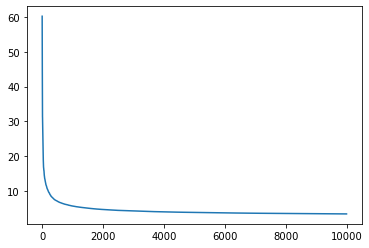

In [6]:
# sort scores in descending order in place in the df
df_anomalies.sort_values(by="score", ascending=False, inplace=True)
anomalies = anomalies[::-1]
plt.plot(df_anomalies["score"].to_numpy())

# Explore average patterns of all spectra and anomalies

In [7]:
# average for anomalies from start_at to finish_at

# config
start_at = 0
finish_at = 10_000

assert start_at < finish_at and finish_at <= 10_000

#########################################################################
median_anomaly = np.median(anomalies[start_at:finish_at, :], axis=0)
mean_anomaly = np.mean(anomalies[start_at:finish_at, :], axis=0)

# save median and mean spectra for later use
save_to = f"{data_directory}/mean_median_anomalous_spectra"

if os.path.exists(save_to) is False:

    os.mkdir(save_to)

np.save(
    f"{save_to}/median_anomaly_"
    f"start_{start_at}_finish_{finish_at}_"
    f"{metric}_{bin_id}.npy",
    median_anomaly,
)

np.save(
    f"{save_to}/mean_anomaly_"
    f"start_{start_at}_finish_{finish_at}_"
    f"{metric}_{bin_id}.npy",
    mean_anomaly,
)

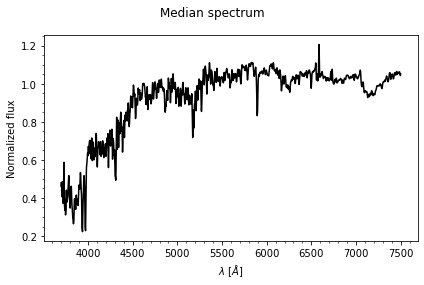

In [8]:
# plot median spectrum
fig, ax = plt.subplots(1, 1, figsize=None, tight_layout=True)
ax.minorticks_on()

fig.suptitle(f"Median spectrum")
ax.plot(wave, median_spectrum, color="black")
ax.set_xlabel("$\lambda$ [$\AA$]")
ax.set_ylabel("Normalized flux")

save_to = f"{user}/explain-me-why/sections/figures/iml_use_cases"

fig.savefig(
    f"{save_to}/median_spectrum_{bin_id}.pdf",
)

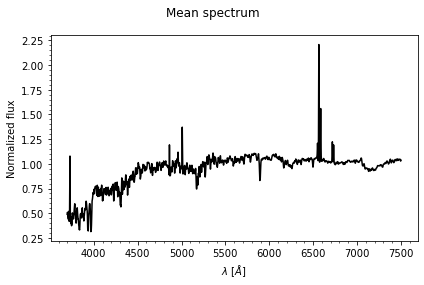

In [9]:
# plot mean spectrum
fig, ax = plt.subplots(1, 1, figsize=None, tight_layout=True)
ax.minorticks_on()

fig.suptitle(f"Mean spectrum")
ax.plot(wave, mean_spectrum, color="black")
ax.set_xlabel("$\lambda$ [$\AA$]")
ax.set_ylabel("Normalized flux")

save_to = f"{user}/explain-me-why/sections/figures/iml_use_cases"

fig.savefig(
    f"{save_to}/mean_spectrum_{bin_id}.pdf",
)

In [10]:
if metric == "mse_noRel100":

    score_name = "MSE"

elif metric == "mse_filter_250kms_noRel97":

    score_name = "MSE (250 km/s) ignore 3%"

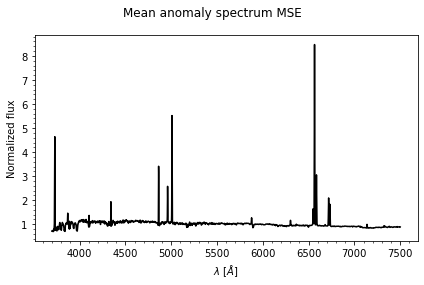

In [11]:
# plot mean anomaly spectrum
fig, ax = plt.subplots(1, 1, figsize=None, tight_layout=True)
ax.minorticks_on()


fig.suptitle(f"Mean anomaly spectrum {score_name}")
ax.plot(wave, mean_anomaly, color="black")
ax.set_xlabel("$\lambda$ [$\AA$]")
ax.set_ylabel("Normalized flux")

save_to = f"{user}/explain-me-why/sections/figures/iml_use_cases"

fig.savefig(
    f"{save_to}/mean_anomaly_metric_{metric}_{bin_id}.pdf",
)

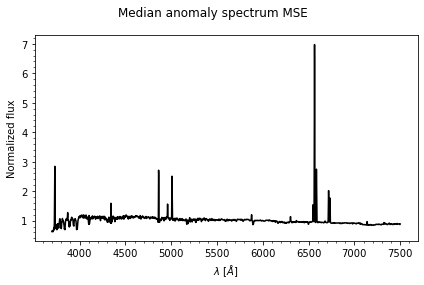

In [12]:
# plot median anomaly spectrum
fig, ax = plt.subplots(1, 1, figsize=None, tight_layout=True)
ax.minorticks_on()

fig.suptitle(f"Median anomaly spectrum {score_name}")
ax.plot(wave, median_anomaly, color="black")
ax.set_xlabel("$\lambda$ [$\AA$]")
ax.set_ylabel("Normalized flux")

save_to = f"{user}/explain-me-why/sections/figures/iml_use_cases"

fig.savefig(
    f"{save_to}/median_anomaly_metric_{metric}_{bin_id}.pdf",
)

In [13]:
# # compare against mean and median spectra
# fig, axs = plt.subplots(
#     2, 2,
#     figsize=None,
#     tight_layout=True
# )

# # add minor ticks for all axes
# set_minorticks(axs)

# # add title to the figure
# fig.suptitle(
#     f"Score:{metric}, {bin_id}\n"
#     f"start:{start_at}, finish:{finish_at}",
#     fontsize=12
# )

# axs[0, 0].plot(wave, median_anomaly)
# axs[0, 0].set_title(
#     f"Median anomaly start:{start_at}, finish:{finish_at}"
# )

# axs[1, 0].plot(wave, mean_anomaly)
# axs[1, 0].set_title(f"Mean anomaly start:{start_at}, finish:{finish_at}")

# axs[0, 1].plot(wave, median_spectrum)
# axs[0, 1].set_title("Median spectrum")

# axs[1, 1].plot(wave, mean_spectrum)
# axs[1, 1].set_title("Mean spectrum")

# # save figure to pdf in Downloads folder
# fig.savefig(
#     f"{data_directory}/mean_median_spectra_anomaly_"
#     f"start_{start_at}_finish_{finish_at}_"
#     f"{metric}_{bin_id}.pdf"
# )

## Explore explanations

In [14]:
%%capture output
# config
median_smooth = True
drop_fraction = 0.05

# create array with weights for top all anomalies

explanations_directory = f"{data_directory}/000"

weights_all = np.empty(anomalies.shape)

for i, specobjid in enumerate(df_anomalies.index.to_numpy()):

    with open(f"{explanations_directory}/{specobjid}.pkl", "rb") as file:

        explanation = pickle.load(file)
        why = TellMeWhy(wave=wave, explanation=explanation)

        weights_all[i, :] = why.smooth_and_normalize_explanation(
            median_smooth=median_smooth, drop_fraction=drop_fraction
        )

# new array to store the absolute values of the weights
weights_all_abs = np.abs(weights_all)

# save both arrays for later use

save_to = f"{data_directory}/explanation_weights"

if os.path.exists(save_to) is False:

    os.mkdir(save_to)

file_name_weights = (
    f"weights_all_"
    f"smooth_{median_smooth}_drop_{drop_fraction}_"
    f"{metric}_{bin_id}.npy"
)

np.save(f"{save_to}/{file_name_weights}", weights_all)

file_name_weights_abs = (
    f"weights_all_abs_"
    f"smooth_{median_smooth}_drop_{drop_fraction}_"
    f"{metric}_{bin_id}.npy"
)
np.save(f"{save_to}/{file_name_weights_abs}", weights_all_abs)

In [15]:
# # how to match line_wavelengths from GALAXY_LINES to wave array

# for line_name, line_wavelength in GALAXY_LINES.items():

#     line_index = np.argmin(np.abs(wave - line_wavelength))

#     print(
#         f"{line_name}:\n wave:"
#         f" {line_wavelength:.2f}, match:{wave[line_index]:.2f}"
#     )

## Summary stats of explanation weights

In [16]:
# mean and median of the explanation weights from start_at to finish_at
# config
start_at = 0
finish_at = 10_000

assert start_at < finish_at and finish_at <= 10_000

#########################################################################
mean_weights_abs_sf = np.mean(weights_all_abs[start_at:finish_at, :], axis=0)

median_weights_abs_sf = np.median(
    weights_all_abs[start_at:finish_at, :], axis=0
)

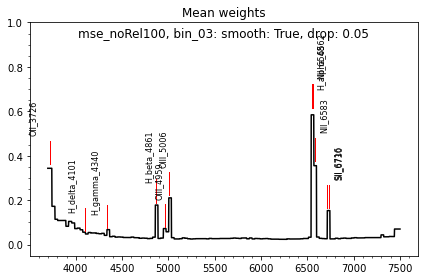

In [17]:
# plot the mean of weights
fig, ax = plt.subplots(1, 1, figsize=None, tight_layout=True)

# add minor ticks for all axes
ax.minorticks_on()

ax.plot(wave, mean_weights_abs_sf, color="black")
# add text to the plot
ax.text(
    x=0.5,
    y=0.95,
    s=(
        f"{metric}, {bin_id}:"
        f" smooth: {median_smooth}, drop: {drop_fraction}"
    ),
    horizontalalignment="center",
    verticalalignment="center",
    transform=ax.transAxes,
    fontsize=12,
)

ax.set_title(f"Mean weights")  # from {start_at} to {finish_at}")
ax.set_ylim([-0.05, 1.0])

# add labels of standard galaxy lines
for line_name, line_wavelength in GALAXY_LINES.items():

    line_index = np.argmin(np.abs(wave - line_wavelength))

    y_min_mean = mean_weights_abs_sf[line_index] + 0.05
    y_max_mean = y_min_mean + 0.1

    ax.axvline(
        x=wave[line_index],
        ymin=y_min_mean,
        ymax=y_max_mean,
        color="red",
        # linestyle="--",
        linewidth=1,
        label=line_name,
    )

    # transform wave of line_index to axis coordinates
    x_line = (wave[line_index] - wave[0]) / (wave[-1] - wave[0])

    ax.text(
        x=x_line,
        y=y_max_mean + 0.1,
        s=line_name,
        rotation="vertical",
        horizontalalignment="center",
        verticalalignment="center",
        transform=ax.transAxes,
        fontsize=8,
    )


# save figure to pdf in figures folder of explain-me-why

save_to = f"{user}/explain-me-why/sections/figures/iml_use_cases"

fig.savefig(
    f"{save_to}/mean_weights_abs_"
    f"from_{start_at}_to_{finish_at}_"
    f"smooth_{median_smooth}_drop_{drop_fraction}_"
    f"{metric}_{bin_id}.pdf"
)

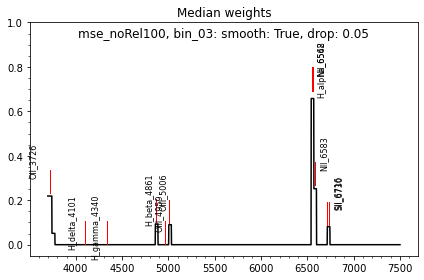

In [18]:
# plot the median of weights
fig, ax = plt.subplots(1, 1, figsize=None, tight_layout=True)

# add minor ticks for all axes
ax.minorticks_on()

ax.plot(wave, median_weights_abs_sf, color="black")
# add text to the plot
ax.text(
    x=0.5,
    y=0.95,
    s=(
        f"{metric}, {bin_id}:"
        f" smooth: {median_smooth}, drop: {drop_fraction}"
    ),
    horizontalalignment="center",
    verticalalignment="center",
    transform=ax.transAxes,
    fontsize=12,
)

ax.set_title(f"Median weights")  # from {start_at} to {finish_at}")
ax.set_ylim([-0.05, 1.0])

# add labels of standard galaxy lines
for line_name, line_wavelength in GALAXY_LINES.items():

    line_index = np.argmin(np.abs(wave - line_wavelength))

    y_min_median = median_weights_abs_sf[line_index] + 0.05
    y_max_median = y_min_median + 0.1

    ax.axvline(
        x=wave[line_index],
        ymin=y_min_median,
        ymax=y_max_median,
        color="red",
        # linestyle="--",
        linewidth=1,
        label=line_name,
    )

    # transform wave of line_index to axis coordinates
    x_line = (wave[line_index] - wave[0]) / (wave[-1] - wave[0])

    ax.text(
        x=x_line,
        y=y_max_median + 0.1,
        s=line_name,
        rotation="vertical",
        horizontalalignment="center",
        verticalalignment="center_baseline",
        transform=ax.transAxes,
        fontsize=8,
    )
# save figure to pdf in figures folder of explain-me-why

save_to = f"{user}/explain-me-why/sections/figures/iml_use_cases"

fig.savefig(
    f"{save_to}/median_weights_abs_"
    f"from_{start_at}_to_{finish_at}_"
    f"smooth_{median_smooth}_drop_{drop_fraction}_"
    f"{metric}_{bin_id}.pdf"
)

## Analysis of raw values from explanation weights

Text(0.5, 1.0, 'Median weights from 0 to 10000')

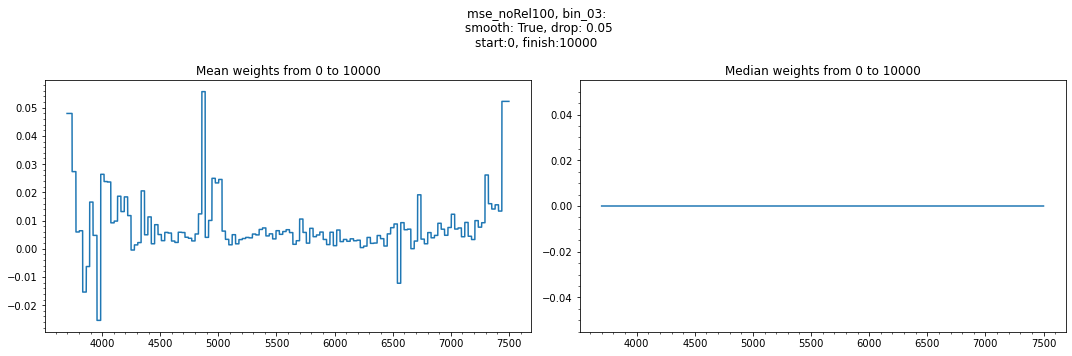

In [19]:
# mean and median of the explanation weights from start_at to finish_at
# config
start_at = 0
finish_at = 10_000

assert start_at < finish_at and finish_at <= 10_000

#########################################################################

mean_weights_sf = np.mean(weights_all[start_at:finish_at, :], axis=0)

median_weights_sf = np.median(weights_all[start_at:finish_at, :], axis=0)


# plot the mean and median of the weights
fig, axs = plt.subplots(1, 2, figsize=(15, 5), tight_layout=True)

# add title to the figure
fig.suptitle(
    f"{metric}, {bin_id}:\n"
    f" smooth: {median_smooth}, drop: {drop_fraction}\n"
    f"start:{start_at}, finish:{finish_at}",
    fontsize=12,
)

# add minor ticks for all axes
set_minorticks(axs)

axs[0].plot(wave, mean_weights_sf)
axs[0].set_title(f"Mean weights from {start_at} to {finish_at}")

axs[1].plot(wave, median_weights_sf)
axs[1].set_title(f"Median weights from {start_at} to {finish_at}")

# save figure to pdf in data directory
# fig.savefig(
#     f"{data_directory}/mean_median_weights_"
#     f"from_{start_at}_to_{finish_at}_"
#     f"smooth_{median_smooth}_drop_{drop_fraction}_"
#     f"{metric}_{bin_id}.pdf"
# )